## Validation Data Analysis

In this notebook, forcing data from different sources used for validation of the Wflow model of the Lake Nakuru catchment will be analysed. 

- Msc Thesis
- Joris-Martijn Schalkwijk
- NBS in Nakuru, Kenya
- March 2025

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
!pip install openpyxl

### Discharge Data Gauge Egerton University, Njoro 2FC19

In [50]:
discharge = pd.read_excel(r'C:\Users\jmsch\OneDrive\Documenten\Studie\Civiele Techniek\Environmental Engineering\Year 2\Afstuderen\NBS Nakuru Kenia\2. QGIS + Wflow\DATA\2025-03-05 WRA data\2FC19 NJORO DISCHARGES.xlsx', skiprows=1)

In [53]:
# load discharge data
discharge.rename(columns={'Unnamed: 0': 'Date', '2FC19 NJORO DISCHARGES':'Discharge 2FC19 (m3/s)'}, inplace=True)	# Rename the first column to 'Date'
discharge['Date'] = pd.to_datetime(discharge['Date'])	# Convert the 'Date' column to datetime
#discharge = discharge.set_index('Date')	# Set the 'Date' column as the index
discharge.replace(-1e-30, np.nan, inplace=True)	# Replace -1e-30 with NaN
discharge = discharge.dropna()	# Remove rows with NaN values

display(discharge)	# Show the data in the table

,Date,Discharge 2FC19 (m3/s)
82,2005-02-11 08:00:00,0.008161
83,2005-02-11 09:06:00,0.008161
84,2005-02-12 08:00:00,0.008161
85,2005-02-12 09:07:00,0.008161
86,2005-02-13 08:00:00,0.008161
...,...,...
6639,2020-06-28 16:00:00,0.005554
6640,2020-06-29 08:00:00,4.637344
6641,2020-06-29 16:00:00,0.006757
6642,2020-06-30 08:00:00,4.400796


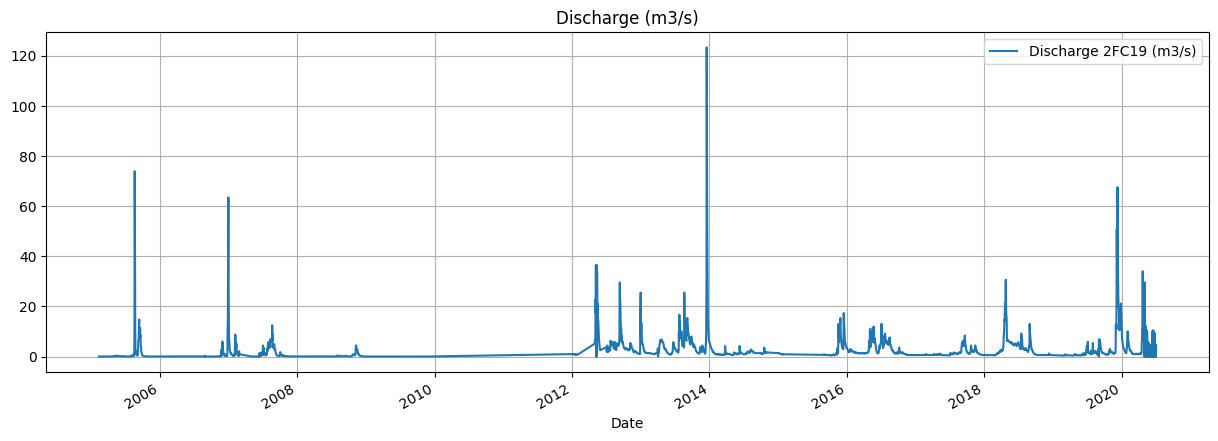

In [56]:
discharge.plot(x='Date', y='Discharge 2FC19 (m3/s)', figsize=(15, 5), title='Discharge (m3/s)', grid=True);	# Plot the discharge data

In [59]:
discharge2012 = discharge.loc[discharge['Date'] >='2012-01-01']	# Select the discharge data for 2012

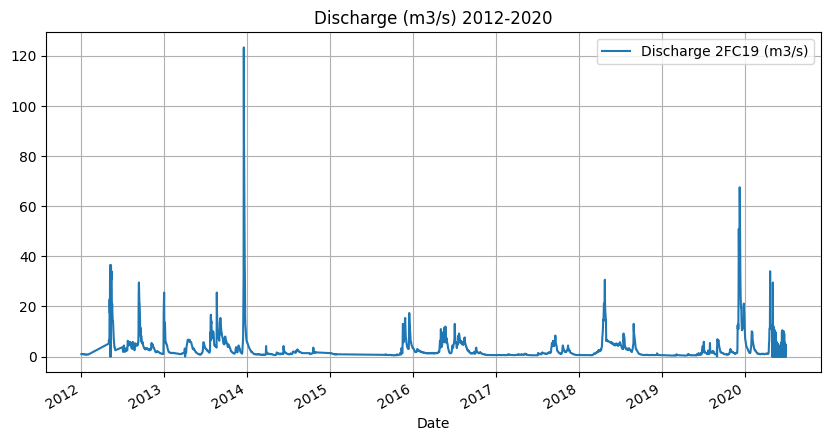

In [64]:
fig, ax = plt.subplots(figsize=(10, 5))	# Create a figure and axis

discharge2012.plot(x='Date', y='Discharge 2FC19 (m3/s)', ax=ax , title='Discharge (m3/s) 2012-2020', grid=True);

# Save the figure to a folder
fig.savefig(r'C:\Users\jmsch\OneDrive\Documenten\Studie\Civiele Techniek\Environmental Engineering\Year 2\Afstuderen\NBS Nakuru Kenia\5. Python\Figures\Discharge_2012_onwards.png', dpi=300, bbox_inches='tight')	# Plot the discharge data for 2012

### Lake Level Data

retrieved from https://dahiti.dgfi.tum.de/en/13220/water-level-altimetry/

In [121]:
lakelevel = pd.read_csv(r'C:\Users\jmsch\OneDrive\Documenten\Studie\Civiele Techniek\Environmental Engineering\Year 2\Afstuderen\NBS Nakuru Kenia\2. QGIS + Wflow\DATA\2025-01-14 Dahiti\Water_level_Lake_Nakuru.csv')

In [122]:
lakelevel.rename(columns={'Date': 'Date', 'Water Level (m)': 'Water level (m)'}, inplace=True)	# Rename the first column to 'Date'
lakelevel = lakelevel.drop(lakelevel.columns[:4], axis=1)	# Remove the first four columns
#lakelevel['Date'] = pd.to_datetime(lakelevel['Date'], format='%d/%M/%Y')	# Convert the 'Date' column to datetime
#display(lakelevel['Date'])	# Show the data in the table
lakelevel['Date'] = pd.to_datetime(lakelevel['Date'], format='%d/%b/%Y')	# Convert the 'Date' column to datetime

# Convert the 'date' column to the desired format
lakelevel['Date'] = lakelevel['Date'].dt.strftime('%Y-%m-%d')
	# Skip the first column

    # Rename the columns
# Display the DataFrame to verify the changes
display(lakelevel)


,Date,Water Level,Water Level Error
0,2016-05-09,1762.874070,0.008083
1,2016-06-05,1763.195744,0.000893
2,2016-07-02,1763.332161,0.003245
3,2016-07-29,1763.440827,0.015869
4,2016-09-21,1763.381872,0.000196
...,...,...,...
147,2024-12-14,1766.940000,0.300000
148,2024-12-19,1766.810000,0.130000
149,2025-01-01,1766.768064,0.009293
150,2025-01-04,1766.820000,0.290000


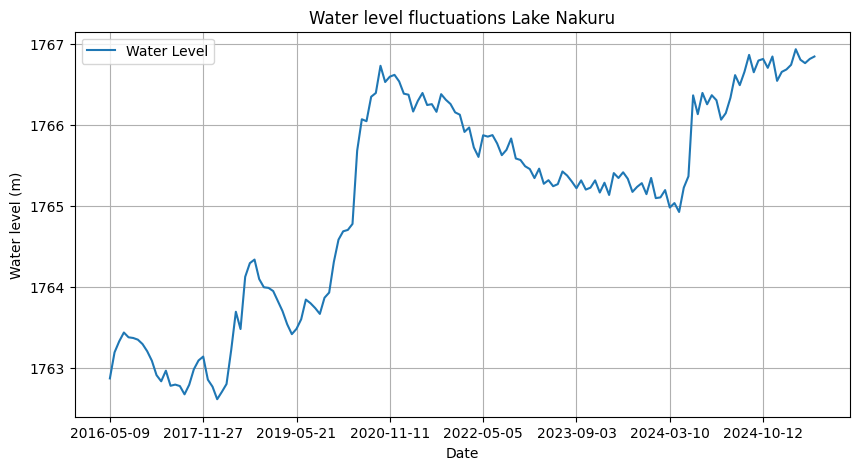

In [124]:
fig, ax = plt.subplots(figsize=(10, 5))	# Create a figure and axis

lakelevel.plot(x='Date', y='Water Level', ylabel='Water level (m)', ax=ax , title='Water level fluctuations Lake Nakuru', grid=True);	# Plot the water level data